# Data Pipeline Project: Global shark attacks

![Sharks](https://i.pinimg.com/474x/84/a4/11/84a4111793c0dc25d622ece09e9f56a7--great-white-shark-the-great-white.jpg)

### Steps:

<b> Problem definition </b>

1. Data collection/acquisition
2. Data cleaning
3. Data manipulation including aggregation, etc.
4. Data vizualisation (plot, table) 

## Problem definition:

I am representing a global non-profit defending sharks and trying to understand:
- What % of attacks lead to death? 
- Why do attacks occur?
- What type of activity is most probable to cause an attack?
- Where do they occur? Who is most likely to suffer from an attack ? (gender)

In order to:
* Protect specific zones if needed from these activities
* Prove that most attacks aren't mortal and they are unprovoked, meaning happening where sharks live.
* Identify the most likely victims to organize targeted campaigns of preventions.

## Data collection

In [2]:
import pandas as pd
import pymysql 
from sqlalchemy import create_engine
import os
import numpy as np

In [9]:
os.chdir('C:/Users/Camille/Documents/Ecole/Ironhack/Week 2/Data_Pipeline_Project/Data')

In [10]:
sharks = pd.read_csv('GSAF5.csv', encoding = "ISO-8859-1")

### Identifying the data to work with

In [11]:
sharks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [12]:
sharks.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6,NaN,NaN
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5,NaN,NaN
5989,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4,NaN,NaN
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3,NaN,NaN
5991,ND.0001,1845-1853,0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,...,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2,NaN,NaN


In [13]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [14]:
sharks.index

RangeIndex(start=0, stop=5992, step=1)

## Data cleaning

### Missing values

In [15]:
#Checking null values
null_sharks=sharks.isna().sum()
null_sharks

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [16]:
null_sharks_perc = round(null_sharks[null_sharks>0]/sharks.shape[0]*100,2)
null_sharks_perc

Country                    0.72
Area                       6.71
Location                   8.28
Activity                   8.80
Name                       3.34
Sex                        9.46
Age                       44.74
Injury                     0.45
Fatal (Y/N)                0.32
Time                      53.62
Species                   48.97
Investigator or Source     0.25
href formula               0.02
href                       0.05
Unnamed: 22               99.98
Unnamed: 23               99.97
dtype: float64

In [17]:
# Dropping columns with more than 70% empty values:
drop_cols=null_sharks_perc[null_sharks_perc>70].index
sharks.drop(drop_cols,axis=1,inplace=True)
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

### Correcting text

In [18]:
#rename some columns:
sharks = sharks.rename(columns={'original order':'unique_number','Sex ':'Sex', 'Fatal (Y/N)': 'Is_Fatal', 'Species ':'Species'})
sharks.head(1)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Is_Fatal,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,unique_number
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993


In [19]:
#checking formats

print(sharks.Year.unique()) #seems ok
print(sharks.Type.unique()) #noticing wrong text values > corrected
print(sharks.Country.unique())  #missing text values > corrected
print(sharks.Area.unique()) #missing text values > corrected
print(sharks.Activity.unique()) #noticing lots of values > corrected
print(sharks.Sex.unique()) #noticing wrong text values/empty > corrected
print(sharks.Is_Fatal.unique()) #noticing wrong text values/empty > corrected

[2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003
 2002 2001 2000 1999 1998 1997 1996 1995 1984 1994 1993 1992 1991 1990
 1989 1969 1988 1987 1986 1985 1983 1982 1981 1980 1979 1978 1977 1976
 1975 1974 1973 1972 1971 1970 1968 1967 1966 1965 1964 1963 1962 1961
 1960 1959 1958 1957 1956 1955 1954 1953 1952 1951 1950 1949 1948 1848
 1947 1946 1945 1944 1943 1942 1941 1940 1939 1938 1937 1936 1935 1934
 1933 1932 1931 1930 1929 1928 1927 1926 1925 1924 1923 1922 1921 1920
 1919 1918 1917 1916 1915 1914 1913 1912 1911 1910 1909 1908 1907 1906
 1905 1904 1903 1902 1901 1900 1899 1898 1897 1896 1895 1894 1893 1892
 1891 1890 1889 1888 1887 1886 1885 1884 1883 1882 1881 1880 1879 1878
 1877 1876 1875 1874 1873 1872 1871 1870 1869 1868 1867 1866 1865 1864
 1863 1862 1861 1860 1859 1858 1856 1855 1854 1853 1852 1851 1850 1849
 1847 1846 1845 1844 1842 1841 1840 1839 1837 1836 1835 1834 1832 1831
 1830 1829 1828 1827 1826 1825 1822 1819 1818 1817 1816 1812 1811 1807
 1805 

In [20]:
#Replacing Is_Fatal
sharks.Is_Fatal=sharks.Is_Fatal.str.replace(' N','N').str.replace('n','N').str.replace('#VALUE!','UNKNOWN').str.replace('N ','N').str.replace('F','UNKNOWN')
sharks.Is_Fatal.unique()

array(['N', 'Y', nan, 'UNKNOWN'], dtype=object)

In [21]:
#Replacing Sex
sharks.Sex=sharks.Sex.str.replace('M ','M').str.replace('N','UNKNOWN').str.replace('lli','UNKNOWN').str.replace('.','UNKNOWN')
sharks.Sex.unique()

array(['M', nan, 'F', 'UNKNOWN'], dtype=object)

In [22]:
#Replacing Type
sharks.Type=sharks.Type.str.replace('Boating','UNKNOWN').str.replace('Invalid','UNKNOWN').str.replace('Sea Disaster','UNKNOWN').str.replace('Boat', 'UNKNOWN')
sharks.Type.unique()

array(['Unprovoked', 'UNKNOWN', 'Provoked'], dtype=object)

In [23]:
#filling empty string by "UNKNOWN" for Is_Fatal, Sex, Activity, Country, Area, Age
sharks[['Is_Fatal','Sex','Activity', 'Country', 'Area', 'Age']]=sharks[['Is_Fatal','Sex','Activity', 'Country', 'Area', 'Age']].fillna('UNKNOWN')
sharks.Sex.unique()

array(['M', 'UNKNOWN', 'F'], dtype=object)

In [24]:
#Replacing Activity: checking how many different activities
sharks.Activity.nunique()

1493

In [25]:
sharks.Activity.unique

<bound method Series.unique of 0            Surfing
1            Surfing
2            Surfing
3            Surfing
4            Surfing
            ...     
5987          Diving
5988    Pearl diving
5989        Swimming
5990         UNKNOWN
5991        Swimming
Name: Activity, Length: 5992, dtype: object>

In [26]:
%time

sharks.loc[sharks['Activity'].str.contains('diving', case=False), 'Activity'] = 'Diving'
sharks.loc[sharks['Activity'].str.contains('dived',case=False), 'Activity'] = 'Diving'
sharks.loc[sharks['Activity'].str.contains('swim', case=False), 'Activity'] = 'Swimming'
sharks.loc[sharks['Activity'].str.contains('bath', case=False), 'Activity'] = 'Swimming'
sharks.loc[sharks['Activity'].str.contains('fish', case=False), 'Activity'] = 'Fishing'
sharks.loc[sharks['Activity'].str.contains('sail',case=False), 'Activity'] = 'Sailing'
sharks.loc[sharks['Activity'].str.contains('surf',case=False), 'Activity'] = 'Surfing'
sharks.loc[sharks['Activity'].str.contains('snorkel',case=False), 'Activity'] = 'Snorkeling'
sharks.loc[sharks['Activity'].str.contains('wading',case=False), 'Activity'] = 'Wading'
sharks.loc[sharks['Activity'].str.contains('canoe',case=False), 'Activity'] = 'Canoeing'
sharks.loc[sharks['Activity'].str.contains('sink',case=False), 'Activity'] = 'Boating'
sharks.loc[sharks['Activity'].str.contains('sank',case=False), 'Activity'] = 'Boating'
sharks.loc[sharks['Activity'].str.contains('wreck',case=False), 'Activity'] = 'Boating'
sharks.loc[sharks['Activity'].str.contains('boat',case=False), 'Activity'] = 'Boating'
sharks.loc[sharks['Activity'].str.contains('raft',case=False), 'Activity'] = 'Boating'
sharks.loc[sharks['Activity'].str.contains('bark',case=False), 'Activity'] = 'Boating'
sharks.loc[sharks['Activity'].str.contains('catamaran',case=False), 'Activity'] = 'Boating'
sharks.loc[sharks['Activity'].str.contains('ship',case=False), 'Activity'] = 'Boating'
sharks.loc[sharks['Activity'].str.contains('vessel',case=False), 'Activity'] = 'Boating'
sharks.loc[sharks['Activity'].str.contains('cargo',case=False), 'Activity'] = 'Boating'
sharks.loc[sharks['Activity'].str.contains('yacht',case=False), 'Activity'] = 'Boating'
sharks.loc[sharks['Activity'].str.contains('fish',case=False), 'Activity'] = 'Fishing'
sharks.loc[sharks['Activity'].str.contains('fell',case=False), 'Activity'] = 'Falling'
sharks.loc[sharks['Activity'].str.contains('fall',case=False), 'Activity'] = 'Falling'
sharks.loc[sharks['Activity'].str.contains('air',case=False), 'Activity'] = 'Air_crash'
sharks.loc[sharks['Activity'].str.contains('plane',case=False), 'Activity'] = 'Air_crash'
sharks.loc[sharks['Activity'].str.contains('board',case=False), 'Activity'] = 'Boarding_sports'
sharks.loc[sharks['Activity'].str.contains('stand',case=False), 'Activity'] = 'Standing'
sharks.loc[sharks['Activity'].str.contains('play',case=False), 'Activity'] = 'Playing'
sharks.loc[sharks['Activity'].str.contains('kayak',case=False), 'Activity'] = 'Kayaking'
sharks.loc[sharks['Activity'].str.contains('walk',case=False), 'Activity'] = 'Walking'

Wall time: 0 ns


In [27]:
activity_list = ['UNKNOWN','Diving', 'Swimming', 'Fishing', 'Bathing', 'Kayaking', 'Sailing', 'Surfing', 'Snorkeling', 'Wading', 'Boating', 'Canoeing','Falling','Air_crash', 'Boarding_sports','Standing', 'Playing', 'Walking']

In [28]:
#Replacing all other activites by 'Other reason'

sharks.loc[~sharks['Activity'].isin(activity_list), 'Activity'] = 'Other_reason'

In [29]:
#Checking how many unique activites after correction

sharks.Activity.nunique()

18

In [30]:
sharks.Activity.unique()

array(['Surfing', 'Fishing', 'Wading', 'Swimming', 'Boarding_sports',
       'Snorkeling', 'Kayaking', 'Other_reason', 'UNKNOWN', 'Diving',
       'Standing', 'Walking', 'Playing', 'Canoeing', 'Air_crash',
       'Falling', 'Sailing', 'Boating'], dtype=object)

### Identifying outliers and odd values

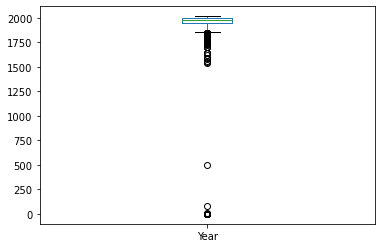

In [31]:
# Checking values with box plots for years

sharks.Year.plot.box();

In [32]:
# Deleting data before 1850
sharks = sharks.drop(sharks[sharks.Year < 1850].index)
sharks.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Is_Fatal,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,unique_number
5751,1852.00.00,1852,1852,Unprovoked,USA,South Carolina,"Mount Pleasant, Charleston County",Wading,Charles Chambers,M,...,Y,NaN,NaN,"W. H. Gregg, p. 21",1852.00.00-Chambers.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1852.00.00,1852.00.00,242
5752,1851.06.19.R,Reported 19-Jun-1851,1851,Unprovoked,MEXICO,Oaxaca,NaN,Swimming,John Gray & another member of the Tehuantepec ...,M,...,Y,NaN,NaN,"Burlington Hawk-Eye, 6/19/1851",1851.06.19.R-JohnGray.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1851.06.19.R,1851.06.19.R,241
5753,1851.03.08.R,Mar-1851,1851,Unprovoked,USA,Hawaii,Honolulu Harbor,Swimming,James Kinney,M,...,Y,NaN,NaN,"The Friend (Honolulu), 3/8/1851",1851.03.08.R-Kinney.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1851.03.08.R,1851.03.08.R,240
5754,1851.00.00,1851,1851,Unprovoked,USA,California,"San Francisco Bay (or San Leandro Bay), near c...",Diving,William Cortigan,M,...,N,NaN,18' shark,"The Perry Chief, 10/16/1875",1851.00.00-Cortigan.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1851.00.00,1851.00.00,239
5755,1850.00.00,1850,1850,Unprovoked,NICARAGUA,Lake Nicaragua (fresh water),"Granada, Granada Department",Swimming,NaN,M,...,Y,NaN,NaN,"E. Squier, 1852, vol. 1",1850.00.00-LakeNicaragua.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1850.00.00,1850.00.00,238


## Data Manipulation

In [33]:
#Goal: aggregate the data for number of attacks per year

attacks_year = pd.DataFrame(sharks.groupby("Year")["Year"].count())
attacks_year.rename(columns={'Year':'Number_year'}, inplace=True)
attacks_year.reset_index()

,Year,Number_year
0,1850,1
1,1851,3
2,1852,10
3,1853,7
4,1854,1
...,...,...
161,2012,117
162,2013,122
163,2014,125
164,2015,139


### Create 3 tables per top country

In [34]:
#Checking top 3 country:
pd.Series(sharks.Country.value_counts()).nlargest(3)

USA             2081
AUSTRALIA       1236
SOUTH AFRICA     557
Name: Country, dtype: int64

In [35]:
# Goal: aggregate countries and areas
#sharks_area = pd.DataFrame( sharks.Country, sharks.Area, sharks.Area.value_counts())

sharks_area = sharks.filter(['Country','Area'], axis=1)
sharks_area

,Country,Area
0,USA,Florida
1,USA,Florida
2,USA,Florida
3,AUSTRALIA,Victoria
4,AUSTRALIA,Victoria
...,...,...
5751,USA,South Carolina
5752,MEXICO,Oaxaca
5753,USA,Hawaii
5754,USA,California


In [36]:
# Creating table for the US
sharks_area_us=sharks_area.loc[sharks_area['Country'] == 'USA']
sharks_area_us.Area.value_counts().nlargest(5)

Florida           979
Hawaii            277
California        273
South Carolina    137
North Carolina     99
Name: Area, dtype: int64

In [37]:
# Creating table for Australia
sharks_area_oz=sharks_area.loc[sharks_area['Country'] == 'AUSTRALIA']
sharks_area_oz.Area.value_counts().nlargest(5)

New South Wales      450
Queensland           294
Western Australia    167
South Australia      101
Victoria              80
Name: Area, dtype: int64

In [38]:
# Creating table for South Africa
sharks_area_za=sharks_area.loc[sharks_area['Country'] == 'SOUTH AFRICA']
sharks_area_za.Area.value_counts().nlargest(5)

KwaZulu-Natal            205
Western Cape Province    186
Eastern Cape Province    155
UNKNOWN                    5
Western Province           1
Name: Area, dtype: int64

## Data Vizualisation

Output wanted: 

- Evolution of shark attacks from the first attack recorded (line chart)
- % of fatal vs not fatal attacks (pie chart)
- % of unprovoked vs provoked attacks (pie chart)
- Breakdown of shark attacks per gender (pie chart)
- All attacks ranked by activity (barchart)
- Countries with all attacks recorded ranked (barchart)
- Within the top 3 countries for shark attacks, % of region where attacks occur (pie chart) 


In [39]:
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
def save_viz(barchart):
    os.chdir('C:/Users/Camille/Documents/Ecole/Ironhack/Week 2/Data_Pipeline_Project/Output')
    fig = barchart.get_figure()
    fig.savefig(title+ '.png')

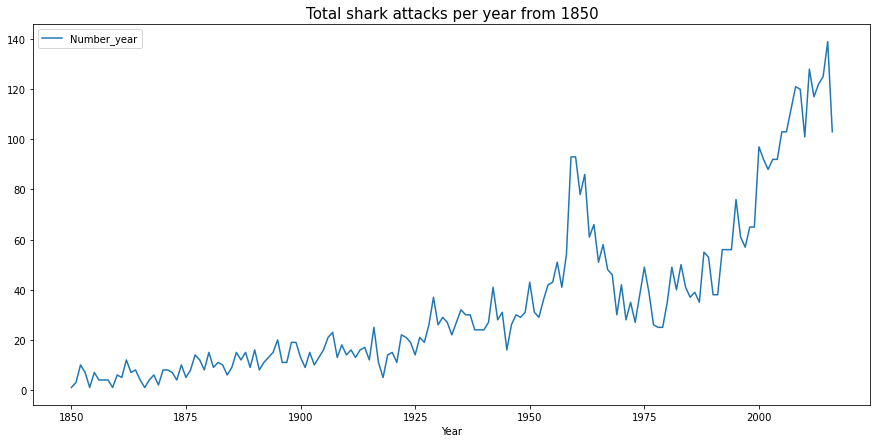

In [73]:
# evolution of shark attacks per year from 1850
chart_attacks_year=attacks_year.plot(figsize=(15, 7)).set_title('Total shark attacks per year from 1850', fontsize=15)
title='Total shark attacks per year from 1850'
save_viz(chart_attacks_year)

#### Conclusion: the number of attack per year is under 140 globally each year.

In [74]:
#Creating a series for Is_Fatal injuries

sharks_fatal = pd.Series(sharks.Is_Fatal.value_counts())
sharks_fatal

N          4223
Y          1430
UNKNOWN     102
Name: Is_Fatal, dtype: int64

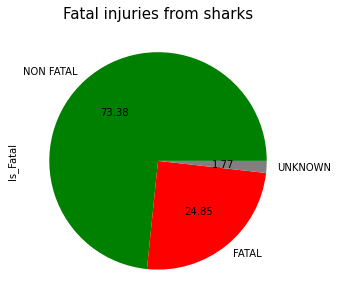

In [75]:
#Creating a pie chart for Is_Fatal
sharks_fatal_chart=sharks_fatal.plot.pie(labels=['NON FATAL', 'FATAL', 'UNKNOWN'], colors=['green', 'r', 'grey'],autopct='%.2f', fontsize=10, figsize=(5, 5)).set_title('Fatal injuries from sharks', fontsize=15)
title='Fatal injuries from sharks'
save_viz(sharks_fatal_chart)

#### Conclusion: majority of shark attacks are not fatal

In [76]:
#Creating a series for Type injuries

sharks_type = pd.Series(sharks.Type.value_counts())
sharks_type

Unprovoked    4188
UNKNOWN       1018
Provoked       549
Name: Type, dtype: int64

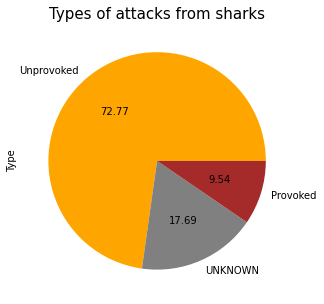

In [77]:
#Creating a pie chart for Type
sharks_type_chart=sharks_type.plot.pie(colors=['orange', 'grey', 'brown'],autopct='%.2f', fontsize=10, figsize=(5, 5)).set_title('Types of attacks from sharks', fontsize=15)

title='Types of attacks from sharks'
save_viz(sharks_type_chart)

#### Conclusion: majority of shark attacks are unprovoked, meaning the human shouldn't have been in the area where the shark is living

In [78]:
#Creating a series for Sex

sharks_sex= pd.Series(sharks.Sex.value_counts())
sharks_sex

M          4642
F           567
UNKNOWN     546
Name: Sex, dtype: int64

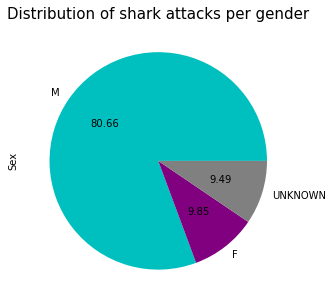

In [79]:
#Creating a pie chart for Sex
sharks_sex_chart=sharks_sex.plot.pie(colors=['c', 'purple', 'grey'],autopct='%.2f', fontsize=10, figsize=(5, 5)).set_title('Distribution of shark attacks per gender', fontsize=15)

title='Distribution of shark attacks per gender'
save_viz(sharks_sex_chart)

#### Most of shark attacks happen to men: they need to be the principal target of our preventive campaign

In [80]:
#Creating a series for activity type 

sharks_activity = pd.Series(sharks.Activity.value_counts(), name ='Activities when attacked by a shark')
sharks_activity

Swimming           1178
Surfing            1111
Fishing            1084
Diving              546
UNKNOWN             476
Other_reason        445
Boating             226
Boarding_sports     158
Wading              152
Standing            119
Snorkeling           78
Falling              50
Kayaking             31
Air_crash            27
Canoeing             23
Walking              18
Sailing              17
Playing              16
Name: Activities when attacked by a shark, dtype: int64

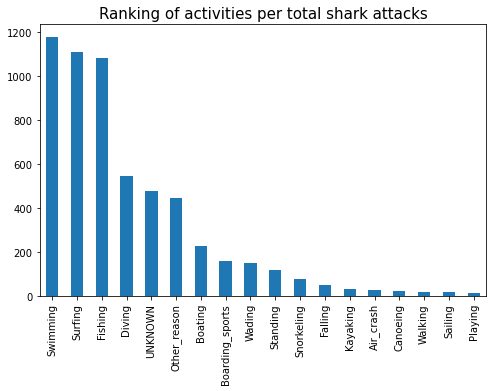

In [81]:
# Creating a ranked bar chart of activities
sharks_activity_chart=sharks_activity.plot.bar(fontsize=10, figsize=(8, 5)).set_title('Ranking of activities per total shark attacks', fontsize=15)

title='Ranking of activities per total shark attacks'
save_viz(sharks_activity_chart)

#### Conclusion: top 3 activities when being attacked by a shark are swimming, surfing and fishing. These are the 3 activites to watch closely.

In [82]:
#Creating a series for top 10 countries

sharks_country = pd.Series(sharks.Country.value_counts()).nlargest(10)
sharks_country

USA                 2081
AUSTRALIA           1236
SOUTH AFRICA         557
PAPUA NEW GUINEA     129
NEW ZEALAND          124
BRAZIL               101
BAHAMAS               95
MEXICO                79
ITALY                 67
PHILIPPINES           59
Name: Country, dtype: int64

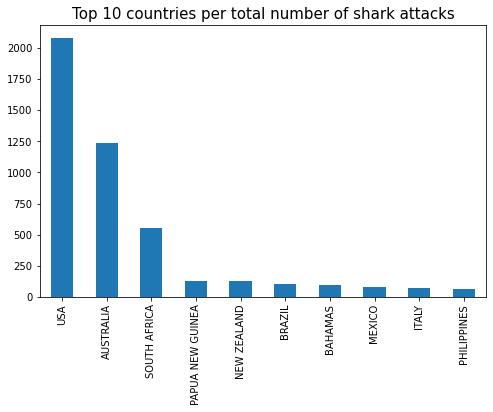

In [83]:
# Creating a ranked bar chart of countries
sharks_country_chart=sharks_country.plot.bar(fontsize=10, figsize=(8, 5)).set_title('Top 10 countries per total number of shark attacks', fontsize=15)

title='Top 10 countries per total number of shark attacks'
save_viz(sharks_country_chart)

#### Conclusion: top 3 countries where to focus our next campaign are USA, Australia and South Africa

In [84]:
# Find out the top 3 areas for attacks within these countries

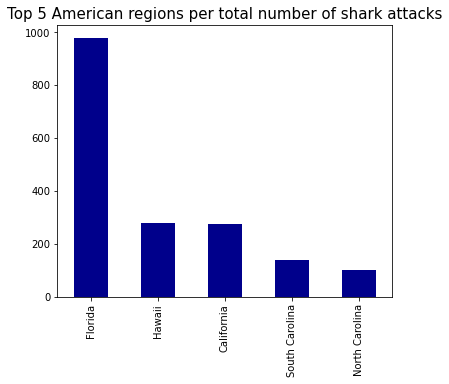

In [85]:
# Creating a ranked bar chart of areas for the US
sharks_area_us_chart=sharks_area_us.Area.value_counts().nlargest(5).plot.bar(fontsize=10, figsize=(6, 5), color='Darkblue').set_title('Top 5 American regions per total number of shark attacks', fontsize=15)

title='Top 5 American regions per total number of shark attacks'
save_viz(sharks_area_us_chart)

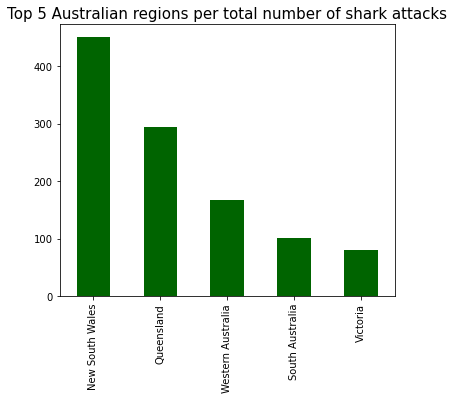

In [86]:
#Bar chart for Australian regions

sharks_area_oz_chart=sharks_area_oz.Area.value_counts().nlargest(5).plot.bar(fontsize=10, figsize=(6, 5), color='Darkgreen').set_title('Top 5 Australian regions per total number of shark attacks', fontsize=15)

title='Top 5 Australian regions per total number of shark attacks'
save_viz(sharks_area_oz_chart)

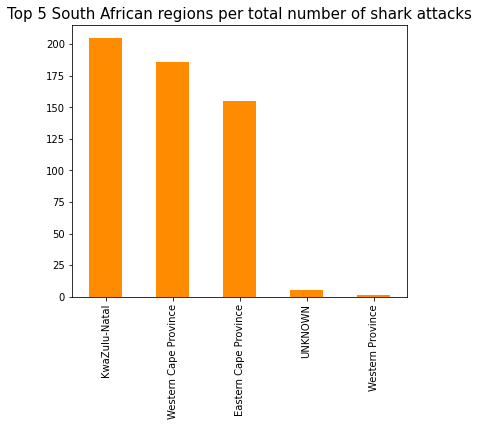

In [87]:
#Bar chart for South Africa
sharks_area_za_chart=za_chart=sharks_area_za.Area.value_counts().nlargest(5).plot.bar(fontsize=10, figsize=(6, 5), color='Darkorange').set_title('Top 5 South African regions per total number of shark attacks', fontsize=15)

title='Top 5 South African regions per total number of shark attacks'
save_viz(sharks_area_za_chart)